CIFAR 10

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = 'C:/input/cifar10/cifar_class'
os.makedirs(PATH,exist_ok=True)

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [4]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats,sz,aug_tfms=[RandomFlip()],pad=sz//8)
    return ImageClassifierData.from_paths(PATH,val_name='test',tfms=tfms,bs=bs)

In [5]:
bs=128

In [6]:
data = get_data(32,4)

In [7]:
x,y = next(iter(data.trn_dl));x.shape,y.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [11]:
x[0].shape

torch.Size([3, 32, 32])

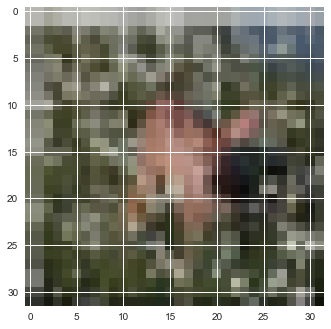

In [13]:
plt.imshow(data.trn_ds.denorm(x)[0]) #反-批量正则化

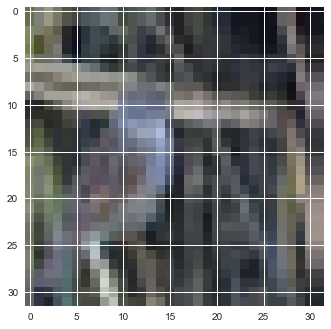

In [14]:
plt.imshow(data.trn_ds.denorm(x)[1]);

In [15]:
from fastai.models.cifar10.resnext import resnext29_8_64
m = resnext29_8_64()
bm = BasicModel(m,name='cifar10_rn29_8_64')

C:\AI\myFunction\fastai\models\cifar10\resnext.py:73: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)


In [16]:
data = get_data(8,bs*4)

In [21]:
learn = ConvLearner(data,bm)
learn.unfreeze()

In [22]:
lr=1e-2;wd=5e-4

In [23]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      3.107548   333927697.5104 0.1       



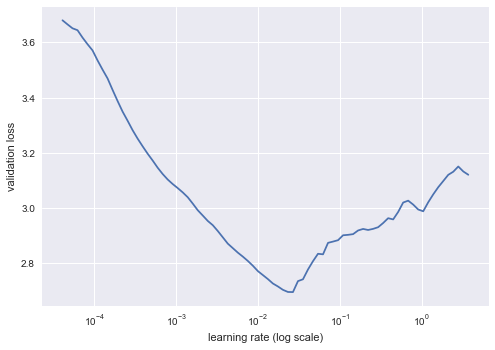

In [24]:
learn.sched.plot()

In [25]:
%time learn.fit(lr, 1)

epoch      trn_loss   val_loss   accuracy   
    0      1.820237   1.65699    0.4197    

Wall time: 3h 5min 20s


[1.6569897026062013, 0.41969999980926515]